### News Category Classification:

 We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1-BUSINESS

2-SPORTS

3-CRIME

4-SCIENCE

In [45]:
import spacy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

###  read the json file

In [6]:
df = pd.read_json('./dataset/News_Category_Dataset_v3.json', lines=True)[['headline', 'category']] 
print(df.shape) 
df.head()

(209527, 2)


,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [7]:
df.category.value_counts() # to get the number of samples in each category.

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [8]:
# Select only the categories that we want to train our model on.
desired_categories = ['CRIME', 'COMEDY', 'EDUCATION', 'SPORTS']
df_new = df[df['category'].isin(desired_categories)]
df_new.head()

,headline,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS


In [9]:
# print the shape of the dataframe.
print(df_new.headline.shape)
print(df_new.category.shape)

(15053,)
(15053,)


In [10]:
df_new.category.value_counts()


COMEDY       5400
SPORTS       5077
CRIME        3562
EDUCATION    1014
Name: category, dtype: int64

### to improve the performance of our model, we will select the same number of samples from each category.

In [11]:
min_samples = 1014 # minimum number of samples in a category.

df_business = df_new[df_new.category=="COMEDY"].sample(min_samples, random_state=0)
df_sports = df_new[df_new.category=="SPORTS"].sample(min_samples, random_state=0)
df_crime = df_new[df_new.category=="CRIME"].sample(min_samples, random_state=0)
df_science = df_new[df_new.category=="EDUCATION"].sample(min_samples, random_state=0)

In [12]:
# concatenate the dataframes
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

COMEDY       1014
SPORTS       1014
CRIME        1014
EDUCATION    1014
Name: category, dtype: int64

In [13]:
# to convert the category names to numbers.
df_balanced['category_num'] = df_balanced['category'].map({
    'COMEDY': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'EDUCATION': 3
})

In [15]:
df_balanced.tail()

,headline,category,category_num
121704,Exercising Restraint in Schools,EDUCATION,3
34394,Just Put My Degree In The Mail! -- Notre Dame ...,EDUCATION,3
106946,"Roald Dahl, The BFG and the Measles",EDUCATION,3
102150,4 Ways the House Republican Budget Hurts Students,EDUCATION,3
110801,Free Speech on Campus,EDUCATION,3


### Build a model with original text

In [23]:
# split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.headline, # features
    df_balanced.category_num,  # target variable
    test_size=0.2, # 20% samples will go to test dataset
    random_state=0,
    stratify=df_balanced.category_num # to maintain the same distribution of categories in train and test sets.
)

In [24]:
print(f"shape of X_train:  {X_train.shape}", f"shape of X_test:  {X_test.shape}", f"shape of y_train:  {y_train.shape}", f"shape of y_test:  {y_test.shape}", sep='\n')

shape of X_train:  (3244,)
shape of X_test:  (812,)
shape of y_train:  (3244,)
shape of y_test:  (812,)


In [25]:
y_train.value_counts()

2    811
0    811
3    811
1    811
Name: category_num, dtype: int64

### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [26]:
# 1. create a pipeline object.
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

# 2. fit the pipeline object to the training data.
clf.fit(X_train, y_train)

# 3. predict the test data.
y_pred = clf.predict(X_test)

# 4. evaluate the model.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       203
           1       0.88      0.81      0.84       203
           2       0.89      0.90      0.90       203
           3       0.82      0.92      0.87       203

    accuracy                           0.86       812
   macro avg       0.86      0.86      0.86       812
weighted avg       0.86      0.86      0.86       812



In [27]:
X_test[:8] # to get the first 8 samples from the test set.

93774     Driver In Crash That Killed Four Could Face Mo...
184088    NFL Week 8 Blitz: Ryan Tannehill's Hot Start; ...
35513     The Special Education Leader Who Taught Me Wha...
69171     NBA Reporter Who Asked Draymond Green Question...
120717                                 Inside The NFL's FBI
19149                Data, Numbers, Education And Audiences
79111                    Legendary NBA Ref To Call it Quits
11255     Topless Protester Arrested Outside Bill Cosby ...
Name: headline, dtype: object

In [29]:
y_pred[:8] # to get the first 8 predictions.
# target = {0: 'COMEDY', 1: 'SPORTS', 2: 'CRIME', 3: 'EDUCATION'}

array([2, 1, 3, 1, 1, 3, 1, 2], dtype=int64)

### Attempt 2 : Use 1-gram to trigrams

In [32]:
# 1. create a pipeline object.
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))), # using the ngram_range parameter
    ('Multi NB', MultinomialNB()) # using the Multinomial Naive Bayes classifier
])

# 2. fit the pipeline object to the training data.
clf.fit(X_train, y_train)

# 3. predict the test data.
y_pred = clf.predict(X_test)

# 4. evaluate the model.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       203
           1       0.88      0.81      0.85       203
           2       0.89      0.89      0.89       203
           3       0.81      0.91      0.86       203

    accuracy                           0.86       812
   macro avg       0.86      0.86      0.86       812
weighted avg       0.86      0.86      0.86       812



### create preproccesing function

In [35]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [36]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess) # apply the preprocess function to the headline column

In [37]:
df_balanced.head() 


,headline,category,category_num,preprocessed_txt
58984,CrossFit With Jesus Will Give You The Body Of ...,COMEDY,0,CrossFit Jesus body angel
43277,Melissa McCarthy Goes Ballistic On 'SNL' To Sl...,COMEDY,0,Melissa McCarthy go Ballistic SNL slay Sean Sp...
84246,eHarmingMe.com Is The Dating Site That Thinks ...,COMEDY,0,eHarmingMe.com Dating Site think toxicity Sexy
7429,Trevor Noah Works Trump's 'Schlong' Into His T...,COMEDY,0,Trevor Noah Works Trump Schlong Takedown Shutdown
106133,Meet The 6 Coworkers Who Make Your Job A Livin...,COMEDY,0,meet 6 Coworkers Job Living Hell


In [38]:
# Build a model with pre processed text
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [39]:
print(f"shape of X_train:  {X_train.shape}", f"shape of X_test:  {X_test.shape}", f"shape of y_train:  {y_train.shape}", f"shape of y_test:  {y_test.shape}", sep='\n')

shape of X_train:  (3244,)
shape of X_test:  (812,)
shape of y_train:  (3244,)
shape of y_test:  (812,)


In [40]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       203
           1       0.80      0.85      0.82       203
           2       0.83      0.90      0.86       203
           3       0.87      0.86      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



### to plot confusion matrix


In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[155,  24,  13,  11],
       [  8, 172,  17,   6],
       [  3,   9, 182,   9],
       [ 12,   9,   8, 174]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

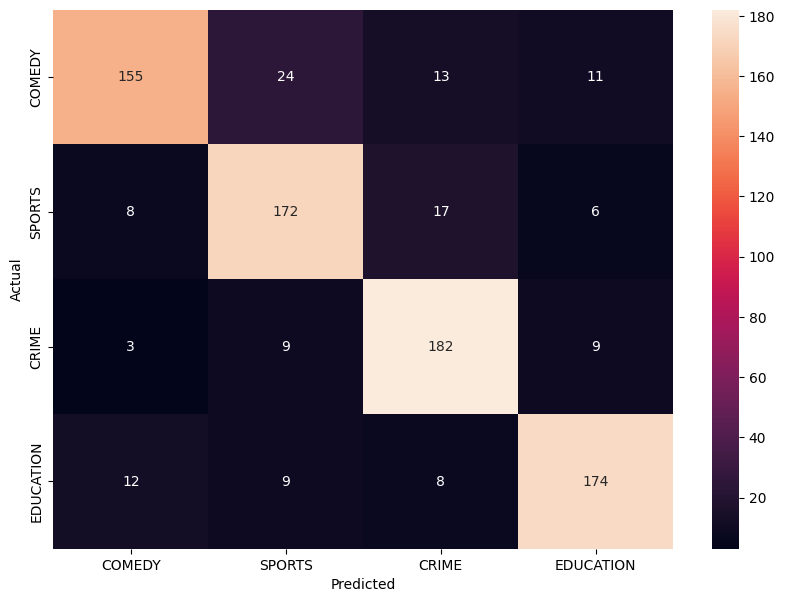

In [51]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',xticklabels=df_balanced.category.unique(), yticklabels=df_balanced.category.unique()) # xticklabels and yticklabels are used to label the axes. , .unique() is used to get the unique values in the category column.
plt.xlabel('Predicted')
plt.ylabel('Actual')